In [6]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def mean_std_vec(folder_dir):
    alignment_losses = []
    uniformity_losses = []
    train_steps = []
    for filename in os.listdir(folder_dir):
        if ".pkl" in filename:
            with open(os.path.join(folder_dir, filename), "rb") as f:
                log = pickle.load(f)
            
            cur_alignment_loss = []
            cur_uniformity_loss = []
            for loss_dict in log[0]:
                cur_alignment_loss.append(loss_dict["loss_T"])
                cur_uniformity_loss.append(loss_dict["loss_disambiguate2"])
            
            alignment_losses.append(cur_alignment_loss)
            uniformity_losses.append(cur_uniformity_loss)
            
            # uniformity_losses.append(log[0]["loss_disentangle
            train_steps.append(log[1])
            
    mean_align = np.mean(alignment_losses, axis=0)
    std_align = np.std(alignment_losses, axis=0)
    # mean_unifo = np.mean(uniformity_losses, axis=0)
    # combined_losses = np.array(alignment_losses) + np.array(alignment_losses)
    # mean_combi = np.mean(combined_losses, axis=0)
    # std_combi = np.std(combined_losses, axis=0)
    return mean_align, std_align, train_steps[0]

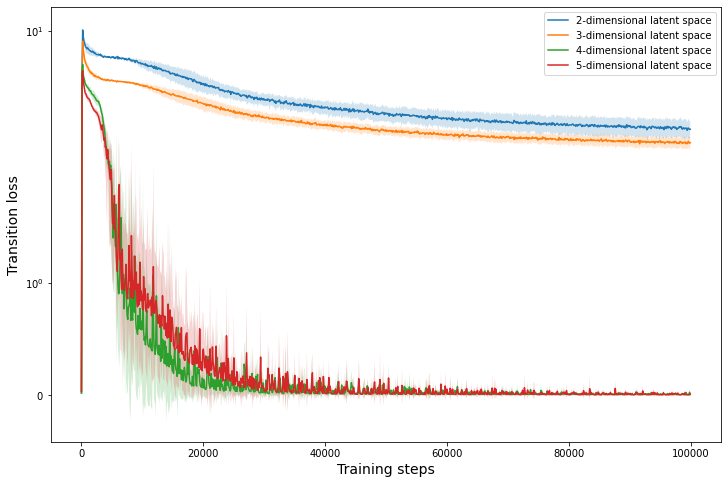

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for latent_dim in range(2, 6):
    mean_vec, std_vec, steps = mean_std_vec(folder_dir=f"report/5x5_unbounded_{latent_dim}_dim_default")
    cur_label = f"{latent_dim}-dimensional latent space"
    ax.plot(steps, mean_vec, label=cur_label)
    ax.fill_between(steps, mean_vec-std_vec, mean_vec+std_vec, alpha=0.2)

ax.legend()
ax.set_ylabel("Transition loss", fontsize=14)
ax.set_xlabel("Training steps", fontsize=14)
ax.set_yscale("symlog")
plt.savefig("dims_comparison.pdf", dpi=200)
plt.show()